# Clustering Facebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sch
import plotly.express as px
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from kneed import KneeLocator

In [2]:
# importo la base de datos
# importing database
df = pd.read_csv("C:/publicacions_facebook_thailandia.csv")
df.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
# tamaño 7050 registros y 16 columnas
# size 7050 records and 16 columns
df.shape

(7050, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [5]:
# elimino las columnas 1,2,3,4 porque tienen todos los elementos nulos y otras columnas no importantes.
# deliting columns 1,2,3,4 because have all null elements and other non important columns.
df1 = df.drop(['Column1','Column2','Column3','Column4','status_id','status_published'], axis = 1)
df1.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [6]:
df1.shape

(7050, 10)

In [7]:
df1.isnull()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
7045,False,False,False,False,False,False,False,False,False,False
7046,False,False,False,False,False,False,False,False,False,False
7047,False,False,False,False,False,False,False,False,False,False
7048,False,False,False,False,False,False,False,False,False,False


In [8]:
df1_clean = df1.drop_duplicates()
if len(df1_clean) == len(df1):
    print("No hi ha elements duplicats")
else:
    print("Hi ha elements duplicats")

Hi ha elements duplicats


In [9]:
# normalizo los datos eliminando los duplicados. 
# normalizing data deliting duplicate elements.
X = np.array(df1_clean[['num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']])
X_standard = StandardScaler().fit_transform(X)
df_X = pd.DataFrame(X_standard, columns = ['num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys'])
df_X['index'] = df_X.index
df_X.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,index
0,0.428405,0.187559,1.339263,0.287588,1.592691,0.120800,0.004418,0.385824,-0.190522,0
1,-0.311534,-0.302896,-0.367850,-0.277435,-0.384256,-0.170652,-0.209508,-0.186997,-0.190522,1
2,-0.161204,-0.076827,0.003545,-0.169239,0.067004,-0.073501,0.004418,-0.186997,-0.190522,2
3,-0.387676,-0.302896,-0.367850,-0.355576,-0.384256,-0.170652,-0.209508,-0.186997,-0.190522,3
4,-0.188536,-0.302896,-0.367850,-0.169239,-0.190859,-0.170652,-0.209508,-0.186997,-0.190522,4


In [10]:
df_X.shape

(4987, 10)

In [11]:
# genero las columnas dummies
# generating dummie columns
dummy = pd.get_dummies(df1_clean['status_type'])
dummy_df = pd.DataFrame(dummy, columns = ['link','photo','status','video'])
dummy_df['index'] = dummy_df.index
dummy_df.head()

,link,photo,status,video,index
0,0,0,0,1,0
1,0,1,0,0,1
2,0,0,0,1,2
3,0,1,0,0,3
4,0,1,0,0,4


In [12]:
dummy_df.shape

(4987, 5)

In [13]:
# añado las columnas dummies a las variables normalizadas.
# adding dummy columns to the normalized variables.
df2 = df_X.merge(dummy_df, on = 'index', how = 'inner')
df3 = df2.drop(['index'], axis = 1)
df3.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,photo,status,video
0,0.428405,0.187559,1.339263,0.287588,1.592691,0.120800,0.004418,0.385824,-0.190522,0,0,0,1
1,-0.311534,-0.302896,-0.367850,-0.277435,-0.384256,-0.170652,-0.209508,-0.186997,-0.190522,0,1,0,0
2,-0.161204,-0.076827,0.003545,-0.169239,0.067004,-0.073501,0.004418,-0.186997,-0.190522,0,0,0,1
3,-0.387676,-0.302896,-0.367850,-0.355576,-0.384256,-0.170652,-0.209508,-0.186997,-0.190522,0,1,0,0
4,-0.188536,-0.302896,-0.367850,-0.169239,-0.190859,-0.170652,-0.209508,-0.186997,-0.190522,0,1,0,0


In [14]:
df3.shape

(3612, 13)

# K-Means

In [15]:
# para poder aplicar el algoritmo k-means hemos de saber cuantos clusters tenemos que utilizar,
# realizo la curva de elbow
# to be able to apply the k-means algorithm we need to know how many clusters we have to use,
# doing elbow bend
kmeans_kwargs = {"init":"k-means++",
                "n_init" : 10,
                "max_iter" : 400,
                "random_state" : 42,}
# una lista de los see valores por cada k
# a list of SEE values for each k
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(df3)
    sse.append(kmeans.inertia_)

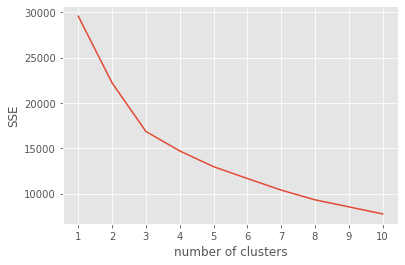

In [16]:
plt.style.use("ggplot")
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel("number of clusters")
plt.ylabel("SSE")
plt.show()

In [17]:
# voy a utilizar kneed.
# I'm going to use kneed.
kl = KneeLocator(range(1,11), sse, curve = "convex", direction = "decreasing")
kl.elbow

3

**el codo se encuentra en el punto 3, ese punto es una compensación razonable entre el error y el número clústeres.**

the elbow is at point 3, that point is a reasonable compensation between the error and the number of clusters.

Text(0, 0.5, 'number of cumulative explained variance')

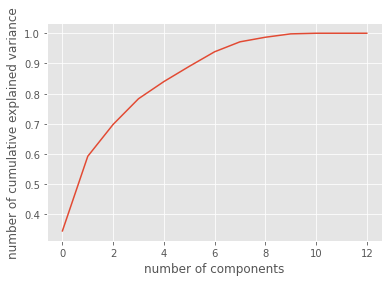

In [18]:
pca = PCA().fit(df3)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('number of cumulative explained variance')

## aplicando el método means a la base de datos / applying the means method to the database

In [19]:
clustering = KMeans(n_clusters = 3, max_iter = 300) # creamos el modelo | creating the model
clustering.fit(df3)

KMeans(n_clusters=3)

## agregando la clasificación al modelo original / adding the classification to the original model

In [20]:
df3['KMeans_Clusters'] = clustering.labels_
df3.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,photo,status,video,KMeans_Clusters
0,0.428405,0.187559,1.339263,0.287588,1.592691,0.120800,0.004418,0.385824,-0.190522,0,0,0,1,0
1,-0.311534,-0.302896,-0.367850,-0.277435,-0.384256,-0.170652,-0.209508,-0.186997,-0.190522,0,1,0,0,0
2,-0.161204,-0.076827,0.003545,-0.169239,0.067004,-0.073501,0.004418,-0.186997,-0.190522,0,0,0,1,0
3,-0.387676,-0.302896,-0.367850,-0.355576,-0.384256,-0.170652,-0.209508,-0.186997,-0.190522,0,1,0,0,0
4,-0.188536,-0.302896,-0.367850,-0.169239,-0.190859,-0.170652,-0.209508,-0.186997,-0.190522,0,1,0,0,0


## visualizando los clusters que se han formado / visualizing the formed clusters

**Para poder realizar la PCA primero tenemos que saber cuantos componentes tenemos que utilizar, vemos que para explicar el 100% de la varianza son necesarios 8 elementos, como los 8 elementos no se pueden representar gráficamente escogeré 2.**

To be able to perform the PCA first we have to know how many components we have to use, we see that to explain 100% of the variance 8 elements are necessary, as the 8 elements cannot be represented graphically I will choose 2.

In [21]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(df3)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Componente_1','Componente_2'])
pca_nombres_data = pd.concat([principalDf, df3['KMeans_Clusters']], axis = 1)
pca_nombres_data.head()

,Componente_1,Componente_2,KMeans_Clusters
0,1.543887,0.956188,0
1,-0.805658,-0.005476,0
2,-0.211704,0.300798,0
3,-0.877392,0.073898,0
4,-0.624311,-0.058306,0


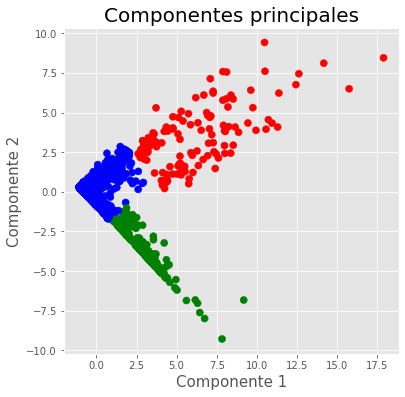

In [22]:
# vamos a representar gráficamente los puntos y los clusteres que se han formado.
# let's graphically represent the points and the clusters that have formed.
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes principales', fontsize = 20)

color_theme = np.array(['blue','green','red'])
ax.scatter(x = pca_nombres_data.Componente_1, 
           y = pca_nombres_data.Componente_2,
           c = color_theme[pca_nombres_data.KMeans_Clusters], s = 50)
plt.show()

In [23]:
pca.explained_variance_ratio_

array([0.35392394, 0.24155601])

In [24]:
# realizo el coeficiente de silhouette.
# performing the silhouette coefficient.
silhouette_coefficients = []
for k in range (2,11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(pca_nombres_data)
    score = silhouette_score(pca_nombres_data, kmeans.labels_)
    silhouette_coefficients.append(score)

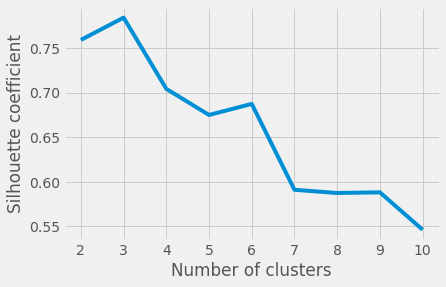

In [25]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette coefficient")
plt.show()

**Podemos observar como el número 3 es el punto que obtiene un valor mayor en el coeficiente.**

We can see how number 3 is the point that obtains a higher value in the coefficient.

In [26]:
# definimos el modelo k-means.
# defining k-mean's model.
kmeans = KMeans(init = "random",
               n_clusters = 3,
               n_init = 10,
               max_iter = 300,
               random_state = 42)

In [27]:
clustering.inertia_

16852.930251963364

In [28]:
# número de iteraciones del modelo.
# number of iterations of the model.
clustering.n_iter_

9

In [29]:
# obtenemos los centroides de los clusteres.
# getting the centroids of the clusters.
clustering.cluster_centers_

array([[-0.26640895, -0.17741551, -0.21610273, -0.25314255, -0.18022708,
        -0.09679616, -0.11626677, -0.05436059, -0.11557486,  0.01045296,
         0.61007285,  0.05543237,  0.32404181],
       [ 2.98094512, -0.2460833 , -0.29203669,  3.09621489, -0.35701043,
        -0.04565716, -0.19551288, -0.1745052 , -0.18284433,  0.03738318,
         0.57009346,  0.17757009,  0.21495327],
       [ 1.22880979,  3.12916509,  3.2303715 ,  0.8996802 ,  3.22598158,
         1.69333495,  1.98722913,  1.27925346,  1.60281087,  0.02238806,
         0.57462687,  0.05223881,  0.35074627]])

## Clasificando los diferentes registros utilizando el algoritmo de clustering jerárquico / Classifying the different records using the hierarchical clustering algorithm

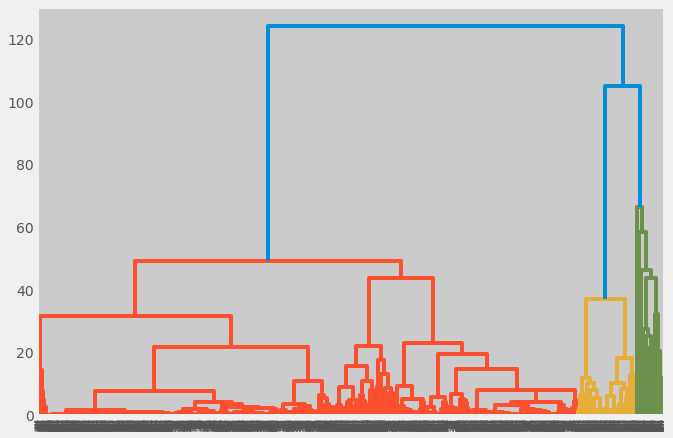

In [30]:
plt.figure(figsize=(10,7))
dendogram = sch.dendrogram(sch.linkage(df3, method = 'ward'))

**Creo una Clustering Agglomerative usando la distancia euclidiana como medida de distancia para calcular la proximidad de los clusteres.**

I create an Agglomerative Clustering using the Euclidean distance as a measure of distance to calculate the proximity of the clusters.


In [32]:
clusteringjerarquic = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean',
                               linkage = 'ward')
clusteringjerarquic.fit(df3)
clustering_jerarquic_labels = clusteringjerarquic.labels_
clustering_jerarquic_labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## Calculando el rendimiento del clustering mediante silhouette / Calculating the performance of clustering by means of silhouette

In [33]:
kmeans_silhouette = silhouette_score(df3, clustering.labels_).round(2)
print('kmeans:', kmeans_silhouette)

kmeans: 0.64


In [34]:
jerarquic_silhouette = silhouette_score(df3, clustering_jerarquic_labels).round(2)
print('clustering jerarquic', jerarquic_silhouette)

clustering jerarquic 0.63
